In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

The differential equation representing a harmonic oscillator is:

$\frac{d^2x}{dt^2} + \omega^2 x = 0$

$\frac{dx}{dt} = v$

$\frac{dv}{dt} = -\omega^2 x$


In [56]:
w = 1 #initial value for omega
x0 = 1 #initial value for X
v0 = 0 #initial value for V
t_max = 10

# Euler Method

In [91]:
def euler_method(t_max, dt, x0, v0, w):
    """Simulate the harmonic oscillator using the Euler method.

    Parameters:
    - t_max (float): Maximum time for the simulation.
    - dt (float): Time step for the simulation.
    - x0 (float): Initial displacement.
    - v0 (float): Initial velocity.
    - w (float): Angular frequency of the oscillator.

    Returns:
    - T (numpy.ndarray): Time array for the simulation.
    - X (numpy.ndarray): Displacement array over time.
    - V (numpy.ndarray): Velocity array over time.
    """
    T = np.arange(0, t_max, dt)
    N = len(T)
    X = np.zeros(N)
    V = np.zeros(N)

    X[0] = x0
    V[0] = v0

    for t in range(N-1):
        X[t+1] = X[t] + dt*(V[t])
        V[t+1] = V[t] + dt*(-(w**2) * X[t])

    return T, X, V


In [264]:
t_euler, x_euler, v_euler = euler_method(t_max, 0.1, x0, v0, w)
#For more information, read page 83 of Tao Pang's book.

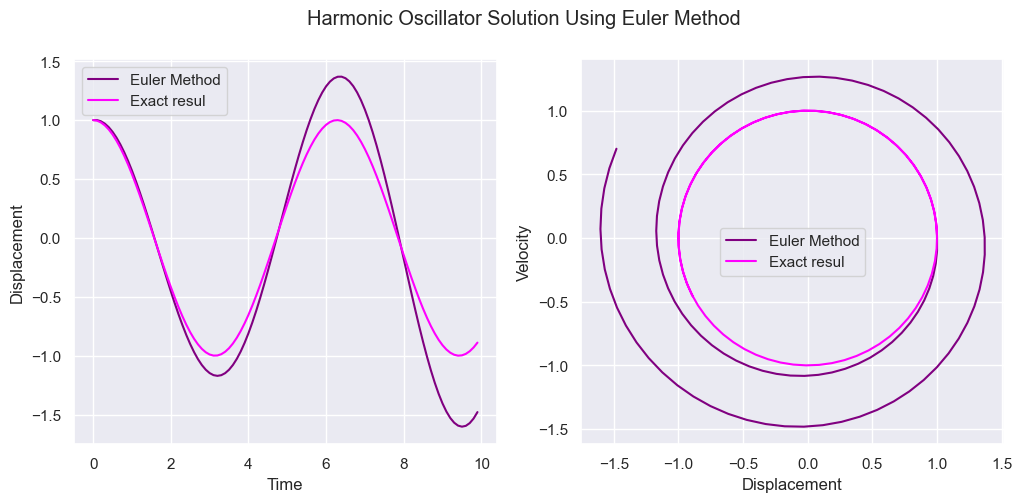

In [263]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].plot(t_euler, x_euler, label='Euler Method', color="purple")
axs[0].plot(t_euler, np.cos(t_euler), label='Exact resul', color="magenta")
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Displacement')

axs[1].plot(x_euler, v_euler, label='Euler Method', color="purple")
axs[1].plot(np.cos(t_euler), np.sin(t_euler), label='Exact resul', color="magenta")
axs[1].set_ylabel('Velocity')
axs[1].set_xlabel('Displacement')

axs[0].legend()
axs[1].legend()
plt.suptitle("Harmonic Oscillator Solution Using Euler Method")
plt.show()

# Picard Method

In [273]:
def picard_method(t_max, dt, x0, v0, w):
    """Solve the harmonic oscillator equation using the Picard method.

    Parameters:
    - t_max (float): Maximum time for the simulation.
    - dt (float): Time step for the simulation.
    - x0 (float): Initial displacement.
    - v0 (float): Initial velocity.
    - w (float): Angular frequency.

    Returns:
    - T (numpy.ndarray): Time array for the simulation.
    - X (numpy.ndarray): Displacement array over time.
    - V (numpy.ndarray): Velocity array over time.
    """
    T = np.arange(0, t_max, dt)
    N = len(T)
    X = np.zeros(N)
    V = np.zeros(N)

    X[0] = x0
    V[0] = v0

    for t in range(N-1):
        
        x_predictor = X[t] + dt*(V[t])
        v_predictor = V[t] + dt*(-(w**2) * X[t])
        
        #Correct the new position and velocity
        X[t+1] = X[t] + 0.5 * dt * (V[t] + v_predictor)
        V[t+1] = V[t] + 0.5 * dt * (-(w**2)) * (X[t] + x_predictor)

    return T, X, V


In [274]:
t_picard, x_picard, v_picard = picard_method(10, 0.1, x0, v0, w)

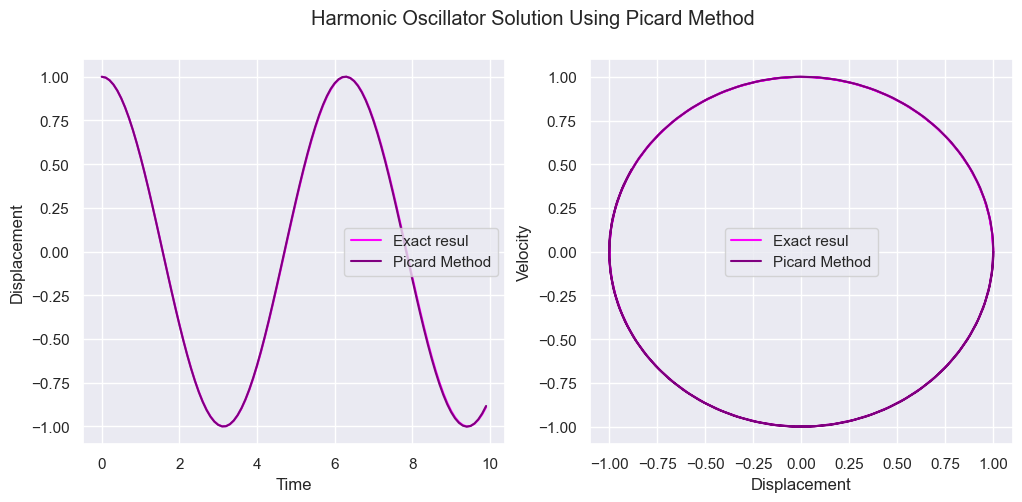

In [293]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].plot(t_euler, np.cos(t_euler), label='Exact resul', color="magenta")
axs[0].plot(t_picard, x_picard, label='Picard Method', color="purple")
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Displacement')

axs[1].plot(np.cos(t_euler), np.sin(t_euler), label='Exact resul', color="magenta")
axs[1].plot(x_picard, v_picard, label='Picard Method', color="purple")
axs[1].set_ylabel('Velocity')
axs[1].set_xlabel('Displacement')

axs[0].legend()
axs[1].legend()

plt.suptitle("Harmonic Oscillator Solution Using Picard Method")
plt.show()

# Predictor-corrector method

In [298]:
def predictor_corrector_method(t_max, dt, x0, v0, w):
    """Solve the harmonic oscillator equation using the Predictor-corrector method.

    Parameters:
    - t_max (float): Maximum time for the simulation.
    - dt (float): Time step for the simulation.
    - x0 (float): Initial displacement.
    - v0 (float): Initial velocity.
    - w (float): Angular frequency.

    Returns:
    - T (numpy.ndarray): Time array for the simulation.
    - X (numpy.ndarray): Displacement array over time.
    - V (numpy.ndarray): Velocity array over time.
    """
    T = np.arange(0, t_max, dt)
    N = len(T)
    X = np.zeros(N)
    V = np.zeros(N)

    X[0] = x0
    V[0] = v0

    for t in range(N-2):
        
        X[t+1] = X[t] + dt*(V[t])
        V[t+1] = V[t] + dt*(-(w**2) * X[t])
        
        x_predictor = X[t] + 2*dt*(V[t+1])
        v_predictor = V[t] + 2*dt*(-(w**2) * X[t+1])

        X[t+2] = X[t] + (dt/3) * (V[t] + 4*V[t+1] + v_predictor)
        V[t+2] = V[t] + (dt/3) * (-(w**2)) * (X[t] + 4*X[t+1] + x_predictor)

    return T, X, V


In [305]:
t_pc, x_pc, v_pc = predictor_corrector_method(t_max, 0.001, x0, v0, w)

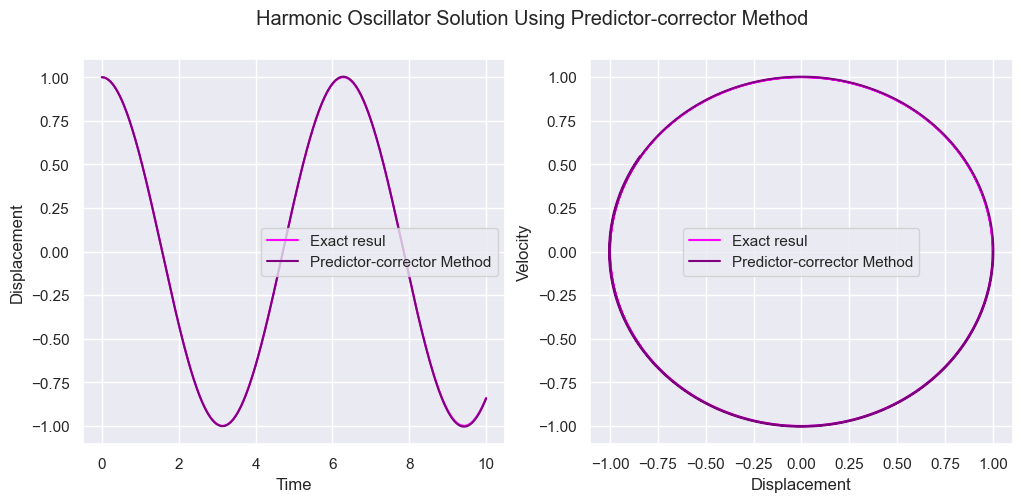

In [306]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].plot(t_pc, np.cos(t_pc), label='Exact resul', color="magenta")
axs[0].plot(t_pc, x_pc, label='Predictor-corrector Method', color="purple")
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Displacement')

axs[1].plot(np.cos(t_pc), np.sin(t_pc), label='Exact resul', color="magenta")
axs[1].plot(x_pc, v_pc, label='Predictor-corrector Method', color="purple")
axs[1].set_ylabel('Velocity')
axs[1].set_xlabel('Displacement')

axs[0].legend()
axs[1].legend()

plt.suptitle("Harmonic Oscillator Solution Using Predictor-corrector Method")
plt.show()